# Overview

This note is written the basic MNIST sample.

# Initial Setting

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from tensorflow.keras.datasets import mnist

np.random.seed(20200426)
tf.random.set_seed(20200426)

print("tensorflow version : " + tf.__version__)

tensorflow version : 2.0.0


# Create input data and deep learning layer

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape((len(x_train), 28*28)).astype('float32')
x_test = x_test.reshape((len(x_test), 28*28)).astype('float32')
x_train = x_train / 255
x_test = x_test / 255

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

model = models.Sequential([
  tf.keras.layers.Dense(128, activation='relu', input_shape=(28*28,)),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Trainning

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 33us/sample - loss: 0.3643 - accuracy: 0.9004 - val_loss: 0.1917 - val_accuracy: 0.9458
Epoch 2/5
60000/60000 [==============================] - 1s 21us/sample - loss: 0.1647 - accuracy: 0.9532 - val_loss: 0.1430 - val_accuracy: 0.9583
Epoch 3/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.1173 - accuracy: 0.9661 - val_loss: 0.1205 - val_accuracy: 0.9635
Epoch 4/5
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0901 - accuracy: 0.9736 - val_loss: 0.0981 - val_accuracy: 0.9706
Epoch 5/5
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0728 - accuracy: 0.9794 - val_loss: 0.0865 - val_accuracy: 0.9741


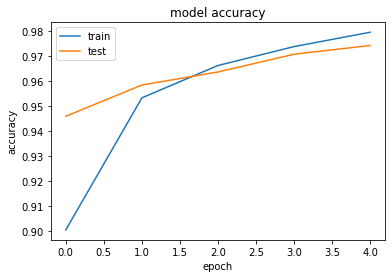

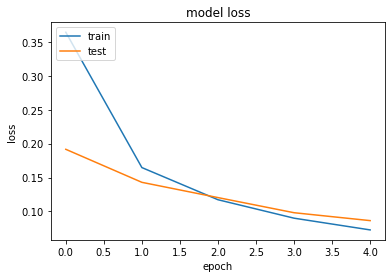

In [3]:
training = model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          batch_size=128,
          epochs=5)

plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Save the model

In [4]:
model.save('models\\mnist.h5')